In [ ]:
# %%

# Use Google Colab
use_google_colab = False
# Process the training dataset
training_data_processing = False
# Train the model
model_training = True
# Validation the model
model_validation = True
# Load the model from your Google Drive or local file system
model_loading = False

import numpy as np
import torch

from util.cuda import cuda
from util.gpu_info import gpuInfo
from util.data_augmentation import training_data_loading, training_data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import submission_creating, test

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *


path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/DLinkNet101.model"

cuda_available = torch.cuda.is_available()
if cuda_available:
    print("CUDA is available. Utilize GPUs for computation")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Utilize CPUs for computation.")
    device = torch.device("cpu")

gpu_info = gpuInfo()

model = DLinkNet101()

if cuda_available:
    model.cuda()

print(model)

# The resolution of resized training images and the corresponding masks
training_resize = 512
# The number of resized training pairs used for data augmentation
training_number = 367
# The resolution of resized testing images
testing_resize = int(608 * training_resize / 400)
if testing_resize % 2 == 1:
    testing_resize += 1

if training_data_processing:
    # Load and generate the resized training dataset and validation dataset
    images_training, labels_training, images_validation, labels_validation = (
        training_data_loading(path_training, training_resize, training_number)
    )
    # Generate the augmented training dataset
    rotations = [0, 45, 90, 135]  # the rotation angle

    flips = ["original", np.flipud, np.fliplr]  # 'original', np.flipud, np.fliplr

    shifts = [(-16, 16)]

    images_augmented, labels_augmented = training_data_augmentation(
        images_training, labels_training, rotations, flips, shifts, training_resize
    )
    # Save the augmented training dataset and resized validation dataset
    # to your Google Drive or local file system
    np.save(f"{path_data}images_training", images_augmented)
    np.save(f"{path_data}labels_training", labels_augmented)
    np.save(f"{path_data}images_validation", images_validation)
    np.save(f"{path_data}labels_validation", labels_validation)
elif not model_loading:
    # Load the augmented training dataset and resized validation dataset
    # from your Google Drive or local file system
    images_augmented = np.load(f"{path_data}images_training.npy")
    labels_augmented = np.load(f"{path_data}labels_training.npy")
    images_validation = np.load(f"{path_data}images_validation.npy")
    labels_validation = np.load(f"{path_data}labels_validation.npy")

if model_training:
    print(f"\nimages_training.shape = {images_augmented.shape}")
    print(f"labels_training.shape = {labels_augmented.shape}")
    print(f"images_validation.shape = {images_validation.shape}")
    print(f"labels_validation.shape = {labels_validation.shape}")

CUDA is available. Utilize GPUs for computation
Tue Nov 19 08:48:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8             16W /  340W |     378MiB /  16376MiB |      9%      Default |
|                                         |                        |                  N/A |


/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DLinkNet101(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256

/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.39903610944747925
→ ACC for Batch 1: 0.4710426330566406
→ Recall for Batch 1: 0.5333533353335334
→ Running_loss for Batch 21: 0.3582371473312378
→ ACC for Batch 21: 0.9542789459228516
→ Recall for Batch 21: 0.0
→ Running_loss for Batch 41: 0.30893880128860474
→ ACC for Batch 41: 0.9760513305664062
→ Recall for Batch 41: 0.34235629841011006
→ Running_loss for Batch 61: 0.31990182399749756
→ ACC for Batch 61: 0.9653186798095703
→ Recall for Batch 61: 0.7935817996855636
→ Running_loss for Batch 81: 0.29432353377342224
→ ACC for Batch 81: 0.9640960693359375
→ Recall for Batch 81: 0.4223172997968797
→ Running_loss for Batch 101: 0.29449203610420227
→ ACC for Batch 101: 0.9722633361816406
→ Recall for Batch 101: 0.808436119993909
→ Running_loss for Batch 121: 0.22927193343639374
→ ACC for Batch 121: 0.9585723876953125
→ Recall for Batch 121: 0.6880733944954128
→ Running_loss for Batch 141: 0.19443002343177795
→ A

  1%|          | 1/100 [15:22<25:22:10, 922.53s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.22575107216835022
→ ACC for Batch 1: 0.9785861968994141
→ Recall for Batch 1: 0.7048086201350917
→ Running_loss for Batch 21: 0.2641972303390503
→ ACC for Batch 21: 0.9630088806152344
→ Recall for Batch 21: 0.3621465874302179
→ Running_loss for Batch 41: 0.19874127209186554
→ ACC for Batch 41: 0.9947738647460938
→ Recall for Batch 41: 0.6989166036785084
→ Running_loss for Batch 61: 0.17572738230228424
→ ACC for Batch 61: 0.9626598358154297
→ Recall for Batch 61: 0.768372008592261
→ Running_loss for Batch 81: 0.14526477456092834
→ ACC for Batch 81: 0.9865207672119141
→ Recall for Batch 81: 0.7488023952095808
→ Running_loss for Batch 101: 0.21197523176670074
→ ACC for Batch 101: 0.9941387176513672
→ Recall for Batch 101: 0.7073107724102299
→ Running_loss for Batch 121: 0.34806028008461
→ ACC for Batch 121: 0.9903831481933594
→ Recall for Batch 121: 0.3684210526315789
→ Running_loss for Batch 141: 0.2099234461

  2%|▏         | 2/100 [27:00<21:30:48, 790.29s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.1568813920021057
→ ACC for Batch 1: 0.9777202606201172
→ Recall for Batch 1: 0.6912178074906936
→ Running_loss for Batch 21: 0.16649307310581207
→ ACC for Batch 21: 0.9914150238037109
→ Recall for Batch 21: 0.6724028716216216
→ Running_loss for Batch 41: 0.1437302529811859
→ ACC for Batch 41: 0.9727230072021484
→ Recall for Batch 41: 0.778928247048138
→ Running_loss for Batch 61: 0.2457309365272522
→ ACC for Batch 61: 0.9893569946289062
→ Recall for Batch 61: 0.787577365163572
→ Running_loss for Batch 81: 0.1848461925983429
→ ACC for Batch 81: 0.9766063690185547
→ Recall for Batch 81: 0.7323565199756642
→ Running_loss for Batch 101: 0.29734984040260315
→ ACC for Batch 101: 0.9902572631835938
→ Recall for Batch 101: 0.4029170464904284
→ Running_loss for Batch 121: 0.18679691851139069
→ ACC for Batch 121: 0.9867935180664062
→ Recall for Batch 121: 0.7251141552511415
→ Running_loss for Batch 141: 0.14412030577

  3%|▎         | 3/100 [37:23<19:14:23, 714.06s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.15188176929950714
→ ACC for Batch 1: 0.9797248840332031
→ Recall for Batch 1: 0.6948220193725834
→ Running_loss for Batch 21: 0.2313668429851532
→ ACC for Batch 21: 0.9840602874755859
→ Recall for Batch 21: 0.5945919845485272
→ Running_loss for Batch 41: 0.1504010260105133
→ ACC for Batch 41: 0.9740848541259766
→ Recall for Batch 41: 0.7300864962561322
→ Running_loss for Batch 61: 0.15131381154060364
→ ACC for Batch 61: 0.983917236328125
→ Recall for Batch 61: 0.6843973379344344
→ Running_loss for Batch 81: 0.1529036909341812
→ ACC for Batch 81: 0.9892501831054688
→ Recall for Batch 81: 0.7456496991380712
→ Running_loss for Batch 101: 0.258568674325943
→ ACC for Batch 101: 0.9872798919677734
→ Recall for Batch 101: 0.5695282289249807
→ Running_loss for Batch 121: 0.2851634919643402
→ ACC for Batch 121: 0.9856739044189453
→ Recall for Batch 121: 0.6545101424255503
→ Running_loss for Batch 141: 0.142530217766

  4%|▍         | 4/100 [48:27<18:30:51, 694.29s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.157772496342659
→ ACC for Batch 1: 0.9804496765136719
→ Recall for Batch 1: 0.7909539142684645
→ Running_loss for Batch 21: 0.1438632309436798
→ ACC for Batch 21: 0.9699878692626953
→ Recall for Batch 21: 0.7542933690555927
→ Running_loss for Batch 41: 0.14573097229003906
→ ACC for Batch 41: 0.9893016815185547
→ Recall for Batch 41: 0.8475131454184984
→ Running_loss for Batch 61: 0.2130819410085678
→ ACC for Batch 61: 0.9937286376953125
→ Recall for Batch 61: 0.7044071098125152
→ Running_loss for Batch 81: 0.20460882782936096
→ ACC for Batch 81: 0.9924545288085938
→ Recall for Batch 81: 0.8129018431204458
→ Running_loss for Batch 101: 0.12589383125305176
→ ACC for Batch 101: 0.9863910675048828
→ Recall for Batch 101: 0.8179480451325112
→ Running_loss for Batch 121: 0.1847289353609085
→ ACC for Batch 121: 0.9898223876953125
→ Recall for Batch 121: 0.7829974811083124
→ Running_loss for Batch 141: 0.1304135322

  5%|▌         | 5/100 [1:00:31<18:36:03, 704.88s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.12785173952579498
→ ACC for Batch 1: 0.9837703704833984
→ Recall for Batch 1: 0.8181121529029931
→ Running_loss for Batch 21: 0.22841180860996246
→ ACC for Batch 21: 0.9898719787597656
→ Recall for Batch 21: 0.702280701754386
→ Running_loss for Batch 41: 0.14193856716156006
→ ACC for Batch 41: 0.9770565032958984
→ Recall for Batch 41: 0.7349938067021526
→ Running_loss for Batch 61: 0.13099518418312073
→ ACC for Batch 61: 0.9712162017822266
→ Recall for Batch 61: 0.7829819277108434
→ Running_loss for Batch 81: 0.1380709558725357
→ ACC for Batch 81: 0.9970474243164062
→ Recall for Batch 81: 0.8058066283210079
→ Running_loss for Batch 101: 0.13894811272621155
→ ACC for Batch 101: 0.9863758087158203
→ Recall for Batch 101: 0.8205316672791866
→ Running_loss for Batch 121: 0.18894647061824799
→ ACC for Batch 121: 0.9978427886962891
→ Recall for Batch 121: 0.7446933962264151
→ Running_loss for Batch 141: 0.1528648

  6%|▌         | 6/100 [1:12:20<18:26:48, 706.48s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.16419504582881927
→ ACC for Batch 1: 0.9913806915283203
→ Recall for Batch 1: 0.6932849364791288
→ Running_loss for Batch 21: 0.11726311594247818
→ ACC for Batch 21: 0.9942722320556641
→ Recall for Batch 21: 0.8113059993296838
→ Running_loss for Batch 41: 0.13406935334205627
→ ACC for Batch 41: 0.9874820709228516
→ Recall for Batch 41: 0.8858307849133538
→ Running_loss for Batch 61: 0.16409948468208313
→ ACC for Batch 61: 0.9794750213623047
→ Recall for Batch 61: 0.8007111935683364
→ Running_loss for Batch 81: 0.17253947257995605
→ ACC for Batch 81: 0.9912300109863281
→ Recall for Batch 81: 0.785945386307752
→ Running_loss for Batch 101: 0.11616069823503494
→ ACC for Batch 101: 0.9763393402099609
→ Recall for Batch 101: 0.8462761506276151
→ Running_loss for Batch 121: 0.13379690051078796
→ ACC for Batch 121: 0.9920101165771484
→ Recall for Batch 121: 0.8189756671899528
→ Running_loss for Batch 141: 0.154524

  7%|▋         | 7/100 [1:22:42<17:31:59, 678.71s/it]

Validation loss for Epoch 7: 0.1687893569469452

Acurácia de validação:  0.9836007162016265
F1-score de validação:  0.6781324723182279
IoU de validação:  0.9720325924514645
Recall de validação:  0.7199446016106342

---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.1346796751022339
→ ACC for Batch 1: 0.9883632659912109
→ Recall for Batch 1: 0.8092003497208958
→ Running_loss for Batch 21: 0.10632553696632385
→ ACC for Batch 21: 0.9936332702636719
→ Recall for Batch 21: 0.8435667155425219
→ Running_loss for Batch 41: 0.21887831389904022
→ ACC for Batch 41: 0.9959812164306641
→ Recall for Batch 41: 0.5612965340179717
→ Running_loss for Batch 61: 0.09840068221092224
→ ACC for Batch 61: 0.9856624603271484
→ Recall for Batch 61: 0.8830890513183575
→ Running_loss for Batch 81: 0.1719234734773636
→ ACC for Batch 81: 0.97869873046875
→ Recall for Batch 81: 0.6801212288193966
→ Running_loss for Batch 101: 0.19557295739650726
→ ACC for Batch 101: 0.9974784851074219
→ R

  8%|▊         | 8/100 [1:33:31<17:06:15, 669.30s/it]

Validation loss for Epoch 8: 0.16917692124843597

Acurácia de validação:  0.9839297554322651
F1-score de validação:  0.6843821717359774
IoU de validação:  0.9725375228676318
Recall de validação:  0.7259839273248171

---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.1212298646569252
→ ACC for Batch 1: 0.9840049743652344
→ Recall for Batch 1: 0.8309671313027017
→ Running_loss for Batch 21: 0.11699194461107254
→ ACC for Batch 21: 0.9756011962890625
→ Recall for Batch 21: 0.846632803539243
→ Running_loss for Batch 41: 0.14753946661949158
→ ACC for Batch 41: 0.9895915985107422
→ Recall for Batch 41: 0.7066022057712645
→ Running_loss for Batch 61: 0.13892331719398499
→ ACC for Batch 61: 0.9886894226074219
→ Recall for Batch 61: 0.7736345993900748
→ Running_loss for Batch 81: 0.10877683013677597
→ ACC for Batch 81: 0.9887485504150391
→ Recall for Batch 81: 0.8645577227776867
→ Running_loss for Batch 101: 0.14356629550457
→ ACC for Batch 101: 0.9920463562011719
→ R

  9%|▉         | 9/100 [1:45:16<17:11:55, 680.39s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.1172773689031601
→ ACC for Batch 1: 0.9938831329345703
→ Recall for Batch 1: 0.7904246631278072
→ Running_loss for Batch 21: 0.1661534160375595
→ ACC for Batch 21: 0.9890842437744141
→ Recall for Batch 21: 0.7554638401650877
→ Running_loss for Batch 41: 0.12570911645889282
→ ACC for Batch 41: 0.9846038818359375
→ Recall for Batch 41: 0.8469895663826936
→ Running_loss for Batch 61: 0.0968945324420929
→ ACC for Batch 61: 0.987579345703125
→ Recall for Batch 61: 0.8854067606120861
→ Running_loss for Batch 81: 0.1394491344690323
→ ACC for Batch 81: 0.9936141967773438
→ Recall for Batch 81: 0.8096528584333462
→ Running_loss for Batch 101: 0.13178183138370514
→ ACC for Batch 101: 0.9938411712646484
→ Recall for Batch 101: 0.8437780340894527
→ Running_loss for Batch 121: 0.12543633580207825
→ ACC for Batch 121: 0.9975509643554688
→ Recall for Batch 121: 0.8220215554908243
→ Running_loss for Batch 141: 0.096009723

 10%|█         | 10/100 [1:55:25<16:27:50, 658.56s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.1416555643081665
→ ACC for Batch 1: 0.9982147216796875
→ Recall for Batch 1: 0.7733634311512415
→ Running_loss for Batch 21: 0.12204816937446594
→ ACC for Batch 21: 0.9924583435058594
→ Recall for Batch 21: 0.8211950599346168
→ Running_loss for Batch 41: 0.14983505010604858
→ ACC for Batch 41: 0.9742355346679688
→ Recall for Batch 41: 0.8093559756488306
→ Running_loss for Batch 61: 0.14369523525238037
→ ACC for Batch 61: 0.9983978271484375
→ Recall for Batch 61: 0.7482552342971087
→ Running_loss for Batch 81: 0.10195918381214142
→ ACC for Batch 81: 0.9928226470947266
→ Recall for Batch 81: 0.8264543143412592
→ Running_loss for Batch 101: 0.1128910630941391
→ ACC for Batch 101: 0.9934234619140625
→ Recall for Batch 101: 0.8280513110733824
→ Running_loss for Batch 121: 0.11985945701599121
→ ACC for Batch 121: 0.9928016662597656
→ Recall for Batch 121: 0.7935495463121013
→ Running_loss for Batch 141: 0.115506

 11%|█         | 11/100 [2:05:57<16:04:41, 650.35s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.0992804542183876
→ ACC for Batch 1: 0.9789886474609375
→ Recall for Batch 1: 0.8640864786395687
→ Running_loss for Batch 21: 0.09489177167415619
→ ACC for Batch 21: 0.9935512542724609
→ Recall for Batch 21: 0.9066888242625675
→ Running_loss for Batch 41: 0.10652627795934677
→ ACC for Batch 41: 0.9928455352783203
→ Recall for Batch 41: 0.8210191082802548
→ Running_loss for Batch 61: 0.11610117554664612
→ ACC for Batch 61: 0.9875030517578125
→ Recall for Batch 61: 0.8503419392461432
→ Running_loss for Batch 81: 0.1321864277124405
→ ACC for Batch 81: 0.9920597076416016
→ Recall for Batch 81: 0.8251720747295969
→ Running_loss for Batch 101: 0.11542629450559616
→ ACC for Batch 101: 0.9974155426025391
→ Recall for Batch 101: 0.82436747727831
→ Running_loss for Batch 121: 0.10460315644741058
→ ACC for Batch 121: 0.9857940673828125
→ Recall for Batch 121: 0.9115564000690966
→ Running_loss for Batch 141: 0.11056687

 12%|█▏        | 12/100 [2:17:33<16:14:10, 664.21s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.1401381641626358
→ ACC for Batch 1: 0.9930286407470703
→ Recall for Batch 1: 0.8396634912779909
→ Running_loss for Batch 21: 0.12499522417783737
→ ACC for Batch 21: 0.9935932159423828
→ Recall for Batch 21: 0.8152185882612047
→ Running_loss for Batch 41: 0.09928251057863235
→ ACC for Batch 41: 0.9946136474609375
→ Recall for Batch 41: 0.8317303021470902
→ Running_loss for Batch 61: 0.12368248403072357
→ ACC for Batch 61: 0.9912395477294922
→ Recall for Batch 61: 0.8056886933291427
→ Running_loss for Batch 81: 0.16860723495483398
→ ACC for Batch 81: 0.9888706207275391
→ Recall for Batch 81: 0.6752612066059993
→ Running_loss for Batch 101: 0.09574809670448303
→ ACC for Batch 101: 0.9826393127441406
→ Recall for Batch 101: 0.8814977035617605
→ Running_loss for Batch 121: 0.12632407248020172
→ ACC for Batch 121: 0.9975433349609375
→ Recall for Batch 121: 0.8817440401505646
→ Running_loss for Batch 141: 0.08278

 13%|█▎        | 13/100 [2:27:28<15:32:39, 643.22s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.12869176268577576
→ ACC for Batch 1: 0.9928436279296875
→ Recall for Batch 1: 0.8726451470750248
→ Running_loss for Batch 21: 0.12536947429180145
→ ACC for Batch 21: 0.9841480255126953
→ Recall for Batch 21: 0.793837315576446
→ Running_loss for Batch 41: 0.09908613562583923
→ ACC for Batch 41: 0.9949989318847656
→ Recall for Batch 41: 0.8590611236437856
→ Running_loss for Batch 61: 0.11182373017072678
→ ACC for Batch 61: 0.9858951568603516
→ Recall for Batch 61: 0.8448169113744914
→ Running_loss for Batch 81: 0.10083797574043274
→ ACC for Batch 81: 0.9915790557861328
→ Recall for Batch 81: 0.8450704225352113
→ Running_loss for Batch 101: 0.1260126829147339
→ ACC for Batch 101: 0.9872856140136719
→ Recall for Batch 101: 0.8084265598040853
→ Running_loss for Batch 121: 0.1003088727593422
→ ACC for Batch 121: 0.9819526672363281
→ Recall for Batch 121: 0.9066051932251145
→ Running_loss for Batch 141: 0.1076472

 14%|█▍        | 14/100 [2:37:25<15:01:57, 629.27s/it]

Validation loss for Epoch 14: 0.1432735174894333

Acurácia de validação:  0.9859311142746283
F1-score de validação:  0.7213798662749585
IoU de validação:  0.9755380290544646
Recall de validação:  0.7523773794279728

---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.09699120372533798
→ ACC for Batch 1: 0.9865818023681641
→ Recall for Batch 1: 0.8794623269913446
→ Running_loss for Batch 21: 0.13676829636096954
→ ACC for Batch 21: 0.9953384399414062
→ Recall for Batch 21: 0.7898270941749203
→ Running_loss for Batch 41: 0.11520740389823914
→ ACC for Batch 41: 0.9959239959716797
→ Recall for Batch 41: 0.8410028562361155
→ Running_loss for Batch 61: 0.0915478840470314
→ ACC for Batch 61: 0.9912853240966797
→ Recall for Batch 61: 0.8630366726296959
→ Running_loss for Batch 81: 0.11720193177461624
→ ACC for Batch 81: 0.996856689453125
→ Recall for Batch 81: 0.8519156263452432
→ Running_loss for Batch 101: 0.11960083991289139
→ ACC for Batch 101: 0.9923267364501953

 15%|█▌        | 15/100 [2:46:43<14:20:54, 607.70s/it]

Validation loss for Epoch 15: 0.14172348380088806

Acurácia de validação:  0.9861551398322695
F1-score de validação:  0.7253077259710486
IoU de validação:  0.9758892455255559
Recall de validação:  0.7557192615050163

---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.10401595383882523
→ ACC for Batch 1: 0.9885063171386719
→ Recall for Batch 1: 0.8678378514816497
→ Running_loss for Batch 21: 0.1283535361289978
→ ACC for Batch 21: 0.9880847930908203
→ Recall for Batch 21: 0.7979480989740495
→ Running_loss for Batch 41: 0.09967676550149918
→ ACC for Batch 41: 0.9940319061279297
→ Recall for Batch 41: 0.8473906404383365
→ Running_loss for Batch 61: 0.10420206189155579
→ ACC for Batch 61: 0.9953174591064453
→ Recall for Batch 61: 0.8822342705837851
→ Running_loss for Batch 81: 0.1568315029144287
→ ACC for Batch 81: 0.9930572509765625
→ Recall for Batch 81: 0.8003681155316438
→ Running_loss for Batch 101: 0.07992855459451675
→ ACC for Batch 101: 0.982164382934570

 16%|█▌        | 16/100 [2:56:42<14:07:13, 605.16s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.11472142487764359
→ ACC for Batch 1: 0.9876213073730469
→ Recall for Batch 1: 0.8683955665554719
→ Running_loss for Batch 21: 0.09941871464252472
→ ACC for Batch 21: 0.9764289855957031
→ Recall for Batch 21: 0.8421560487399861
→ Running_loss for Batch 41: 0.12149178981781006
→ ACC for Batch 41: 0.9940757751464844
→ Recall for Batch 41: 0.8086986068637445
→ Running_loss for Batch 61: 0.1040005013346672
→ ACC for Batch 61: 0.9950447082519531
→ Recall for Batch 61: 0.8662464985994398
→ Running_loss for Batch 81: 0.09610548615455627
→ ACC for Batch 81: 0.9932460784912109
→ Recall for Batch 81: 0.8606042018095384
→ Running_loss for Batch 101: 0.11567766964435577
→ ACC for Batch 101: 0.9943599700927734
→ Recall for Batch 101: 0.857834455071437
→ Running_loss for Batch 121: 0.0780661553144455
→ ACC for Batch 121: 0.9901504516601562
→ Recall for Batch 121: 0.8930080756517009
→ Running_loss for Batch 141: 0.1022601

 17%|█▋        | 17/100 [3:06:13<13:43:00, 594.95s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.09611483663320541
→ ACC for Batch 1: 0.9804840087890625
→ Recall for Batch 1: 0.8565930299994727
→ Running_loss for Batch 21: 0.09162115305662155
→ ACC for Batch 21: 0.9855842590332031
→ Recall for Batch 21: 0.8629608314431768
→ Running_loss for Batch 41: 0.08984902501106262
→ ACC for Batch 41: 0.9914741516113281
→ Recall for Batch 41: 0.8609083310114238
→ Running_loss for Batch 61: 0.12314939498901367
→ ACC for Batch 61: 0.9912681579589844
→ Recall for Batch 61: 0.7857578065498858
→ Running_loss for Batch 81: 0.11066551506519318
→ ACC for Batch 81: 0.9958438873291016
→ Recall for Batch 81: 0.8903276131045241
→ Running_loss for Batch 101: 0.13141359388828278
→ ACC for Batch 101: 0.9777908325195312
→ Recall for Batch 101: 0.802928758126131
→ Running_loss for Batch 121: 0.07878673821687698
→ ACC for Batch 121: 0.9949665069580078
→ Recall for Batch 121: 0.9237085186452275
→ Running_loss for Batch 141: 0.06407

 18%|█▊        | 18/100 [3:19:05<14:45:53, 648.21s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.10986457765102386
→ ACC for Batch 1: 0.9963893890380859
→ Recall for Batch 1: 0.8435339740347327
→ Running_loss for Batch 21: 0.1113230288028717
→ ACC for Batch 21: 0.9965457916259766
→ Recall for Batch 21: 0.825399613560513
→ Running_loss for Batch 41: 0.09805012494325638
→ ACC for Batch 41: 0.9820899963378906
→ Recall for Batch 41: 0.8904475412855302
→ Running_loss for Batch 61: 0.09761606156826019
→ ACC for Batch 61: 0.9927120208740234
→ Recall for Batch 61: 0.8847129008202834
→ Running_loss for Batch 81: 0.11088699847459793
→ ACC for Batch 81: 0.9941577911376953
→ Recall for Batch 81: 0.8502702129914168
→ Running_loss for Batch 101: 0.08066965639591217
→ ACC for Batch 101: 0.9905586242675781
→ Recall for Batch 101: 0.8937389169281135
→ Running_loss for Batch 121: 0.08536738157272339
→ ACC for Batch 121: 0.9962959289550781
→ Recall for Batch 121: 0.9070179883455789
→ Running_loss for Batch 141: 0.094779

 19%|█▉        | 19/100 [3:31:41<15:18:34, 680.42s/it]

Validation loss for Epoch 19: 0.13640359044075012

Acurácia de validação:  0.9869169920010674
F1-score de validação:  0.7396105799584981
IoU de validação:  0.9770756955785956
Recall de validação:  0.7671134924206531

---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.08681390434503555
→ ACC for Batch 1: 0.9920864105224609
→ Recall for Batch 1: 0.9030222916541489
→ Running_loss for Batch 21: 0.09638919681310654
→ ACC for Batch 21: 0.9943866729736328
→ Recall for Batch 21: 0.8622367805334581
→ Running_loss for Batch 41: 0.0873754620552063
→ ACC for Batch 41: 0.9856796264648438
→ Recall for Batch 41: 0.887574159525379
→ Running_loss for Batch 61: 0.06743427366018295
→ ACC for Batch 61: 0.9922370910644531
→ Recall for Batch 61: 0.9173893199452305
→ Running_loss for Batch 81: 0.08607396483421326
→ ACC for Batch 81: 0.9807090759277344
→ Recall for Batch 81: 0.8835378836814278
→ Running_loss for Batch 101: 0.11698060482740402
→ ACC for Batch 101: 0.998767852783203

 20%|██        | 20/100 [3:44:18<15:37:47, 703.35s/it]


---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.10123633593320847
→ ACC for Batch 1: 0.9868755340576172
→ Recall for Batch 1: 0.8856051729375516
→ Running_loss for Batch 21: 0.10647730529308319
→ ACC for Batch 21: 0.9939517974853516
→ Recall for Batch 21: 0.8630799605133268
→ Running_loss for Batch 41: 0.1189194917678833
→ ACC for Batch 41: 0.99798583984375
→ Recall for Batch 41: 0.7920886075949367
→ Running_loss for Batch 61: 0.11196547746658325
→ ACC for Batch 61: 0.9837207794189453
→ Recall for Batch 61: 0.8996912326318356
→ Running_loss for Batch 81: 0.12389303743839264
→ ACC for Batch 81: 0.9824256896972656
→ Recall for Batch 81: 0.842580487007681
→ Running_loss for Batch 101: 0.09849312901496887
→ ACC for Batch 101: 0.9914474487304688
→ Recall for Batch 101: 0.8512074303405572
→ Running_loss for Batch 121: 0.134133979678154
→ ACC for Batch 121: 0.9900417327880859
→ Recall for Batch 121: 0.780689240934004
→ Running_loss for Batch 141: 0.12985979020

 21%|██        | 21/100 [3:57:21<15:57:34, 727.27s/it]

Validation loss for Epoch 21: 0.13170824944972992

Acurácia de validação:  0.9872272541733826
F1-score de validação:  0.7454663617303791
IoU de validação:  0.977565782558467
Recall de validação:  0.772263801162157

---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.11533382534980774
→ ACC for Batch 1: 0.9911632537841797
→ Recall for Batch 1: 0.8300696257615318
→ Running_loss for Batch 21: 0.12074021995067596
→ ACC for Batch 21: 0.9955215454101562
→ Recall for Batch 21: 0.8150695171176559
→ Running_loss for Batch 41: 0.08806724101305008
→ ACC for Batch 41: 0.9908943176269531
→ Recall for Batch 41: 0.8880855077019805
→ Running_loss for Batch 61: 0.12877991795539856
→ ACC for Batch 61: 0.9879341125488281
→ Recall for Batch 61: 0.8100728155339806
→ Running_loss for Batch 81: 0.14788059890270233
→ ACC for Batch 81: 0.9815349578857422
→ Recall for Batch 81: 0.8495682472352674
→ Running_loss for Batch 101: 0.09279637783765793
→ ACC for Batch 101: 0.986461639404296

 22%|██▏       | 22/100 [4:09:59<15:57:36, 736.62s/it]

Validation loss for Epoch 22: 0.1319374442100525

Acurácia de validação:  0.987363137208022
F1-score de validação:  0.7479675016814503
IoU de validação:  0.9777803549326511
Recall de validação:  0.7745795530586508

---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.0947830006480217
→ ACC for Batch 1: 0.9885044097900391
→ Recall for Batch 1: 0.8555467581595848
→ Running_loss for Batch 21: 0.09849464893341064
→ ACC for Batch 21: 0.9937286376953125
→ Recall for Batch 21: 0.879325410695561
→ Running_loss for Batch 41: 0.101659394800663
→ ACC for Batch 41: 0.9903030395507812
→ Recall for Batch 41: 0.8606221504011081
→ Running_loss for Batch 61: 0.06806476414203644
→ ACC for Batch 61: 0.9949607849121094
→ Recall for Batch 61: 0.8948859709744299
→ Running_loss for Batch 81: 0.12641413509845734
→ ACC for Batch 81: 0.9964313507080078
→ Recall for Batch 81: 0.8163100524828422
→ Running_loss for Batch 101: 0.11170056462287903
→ ACC for Batch 101: 0.9942836761474609
→ 

 23%|██▎       | 23/100 [4:20:40<15:08:28, 707.90s/it]


---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.07701781392097473
→ ACC for Batch 1: 0.9886531829833984
→ Recall for Batch 1: 0.898429921316423
→ Running_loss for Batch 21: 0.11706148087978363
→ ACC for Batch 21: 0.9933795928955078
→ Recall for Batch 21: 0.8300187988522806
→ Running_loss for Batch 41: 0.10972454398870468
→ ACC for Batch 41: 0.9992885589599609
→ Recall for Batch 41: 0.8657894736842106
→ Running_loss for Batch 61: 0.11490806937217712
→ ACC for Batch 61: 0.9957942962646484
→ Recall for Batch 61: 0.8362134883009634
→ Running_loss for Batch 81: 0.11698614060878754
→ ACC for Batch 81: 0.9901561737060547
→ Recall for Batch 81: 0.8392881038404925
→ Running_loss for Batch 101: 0.06262272596359253
→ ACC for Batch 101: 0.9960746765136719
→ Recall for Batch 101: 0.9115384615384615
→ Running_loss for Batch 121: 0.07700710743665695
→ ACC for Batch 121: 0.9925804138183594
→ Recall for Batch 121: 0.8928726877040262
→ Running_loss for Batch 141: 0.13753

 24%|██▍       | 24/100 [4:32:41<15:01:41, 711.86s/it]


---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.1211731880903244
→ ACC for Batch 1: 0.9937915802001953
→ Recall for Batch 1: 0.8524404086265607
→ Running_loss for Batch 21: 0.14414331316947937
→ ACC for Batch 21: 0.9664173126220703
→ Recall for Batch 21: 0.8346374410602778
→ Running_loss for Batch 41: 0.09171099215745926
→ ACC for Batch 41: 0.9905147552490234
→ Recall for Batch 41: 0.875
→ Running_loss for Batch 61: 0.16314272582530975
→ ACC for Batch 61: 0.9960117340087891
→ Recall for Batch 61: 0.6835902085222122
→ Running_loss for Batch 81: 0.1408601701259613
→ ACC for Batch 81: 0.9753704071044922
→ Recall for Batch 81: 0.817506330801013
→ Running_loss for Batch 101: 0.09095295518636703
→ ACC for Batch 101: 0.9971103668212891
→ Recall for Batch 101: 0.8572378261592155
→ Running_loss for Batch 121: 0.07403945177793503
→ ACC for Batch 121: 0.9895267486572266
→ Recall for Batch 121: 0.9190718517393286
→ Running_loss for Batch 141: 0.10570143908262253
→ 

 25%|██▌       | 25/100 [4:45:56<15:20:58, 736.79s/it]

Validation loss for Epoch 25: 0.1286601722240448

Acurácia de validação:  0.9877444989340646
F1-score de validação:  0.7550851145437727
IoU de validação:  0.9783731429851557
Recall de validação:  0.7793415433752258

---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.09746917337179184
→ ACC for Batch 1: 0.9917163848876953
→ Recall for Batch 1: 0.8934345100626856
→ Running_loss for Batch 21: 0.11500450223684311
→ ACC for Batch 21: 0.9907741546630859
→ Recall for Batch 21: 0.83399209486166
→ Running_loss for Batch 41: 0.08181080222129822
→ ACC for Batch 41: 0.9913043975830078
→ Recall for Batch 41: 0.9211853392253704
→ Running_loss for Batch 61: 0.1348932683467865
→ ACC for Batch 61: 0.9846954345703125
→ Recall for Batch 61: 0.804685123212656
→ Running_loss for Batch 81: 0.07120280712842941
→ ACC for Batch 81: 0.9929714202880859
→ Recall for Batch 81: 0.9110825432535219
→ Running_loss for Batch 101: 0.0783872976899147
→ ACC for Batch 101: 0.99462890625
→ Recal

 26%|██▌       | 26/100 [4:59:30<15:37:06, 759.81s/it]

Validation loss for Epoch 26: 0.12816624343395233

Acurácia de validação:  0.9878508330701472
F1-score de validação:  0.7570980564028574
IoU de validação:  0.9785381502370847
Recall de validação:  0.7807462830342186

---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.07913090288639069
→ ACC for Batch 1: 0.9953136444091797
→ Recall for Batch 1: 0.8873339869863625
→ Running_loss for Batch 21: 0.0765058845281601
→ ACC for Batch 21: 0.9965000152587891
→ Recall for Batch 21: 0.9227666389844584
→ Running_loss for Batch 41: 0.11252065747976303
→ ACC for Batch 41: 0.9906883239746094
→ Recall for Batch 41: 0.8309952795691776
→ Running_loss for Batch 61: 0.0786285400390625
→ ACC for Batch 61: 0.9954471588134766
→ Recall for Batch 61: 0.8910250569476083
→ Running_loss for Batch 81: 0.09012902528047562
→ ACC for Batch 81: 0.9921932220458984
→ Recall for Batch 81: 0.9028505688354851
→ Running_loss for Batch 101: 0.1292475014925003
→ ACC for Batch 101: 0.9823417663574219

 27%|██▋       | 27/100 [5:11:31<15:10:20, 748.23s/it]


---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.11628127843141556
→ ACC for Batch 1: 0.9946117401123047
→ Recall for Batch 1: 0.8536135693215339
→ Running_loss for Batch 21: 0.0737970843911171
→ ACC for Batch 21: 0.9952583312988281
→ Recall for Batch 21: 0.9012143091565474
→ Running_loss for Batch 41: 0.10395552217960358
→ ACC for Batch 41: 0.9915370941162109
→ Recall for Batch 41: 0.8499260056504776
→ Running_loss for Batch 61: 0.07961558550596237
→ ACC for Batch 61: 0.9859771728515625
→ Recall for Batch 61: 0.8844525286259542
→ Running_loss for Batch 81: 0.11885987967252731
→ ACC for Batch 81: 0.9979286193847656
→ Recall for Batch 81: 0.8200703100031959
→ Running_loss for Batch 101: 0.07454777508974075
→ ACC for Batch 101: 0.9961471557617188
→ Recall for Batch 101: 0.9002541942043721
→ Running_loss for Batch 121: 0.10418608784675598
→ ACC for Batch 121: 0.9979991912841797
→ Recall for Batch 121: 0.8250688705234159
→ Running_loss for Batch 141: 0.10413

 28%|██▊       | 28/100 [5:23:34<14:48:51, 740.71s/it]


---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.14347274601459503
→ ACC for Batch 1: 0.9756984710693359
→ Recall for Batch 1: 0.8226323389567851
→ Running_loss for Batch 21: 0.0801798403263092
→ ACC for Batch 21: 0.9952430725097656
→ Recall for Batch 21: 0.8965610128400826
→ Running_loss for Batch 41: 0.0747750997543335
→ ACC for Batch 41: 0.9942874908447266
→ Recall for Batch 41: 0.8918420333424433
→ Running_loss for Batch 61: 0.08253879845142365
→ ACC for Batch 61: 0.9957904815673828
→ Recall for Batch 61: 0.887765735723218
→ Running_loss for Batch 81: 0.08492404967546463
→ ACC for Batch 81: 0.9906463623046875
→ Recall for Batch 81: 0.8636794240242516
→ Running_loss for Batch 101: 0.1056843250989914
→ ACC for Batch 101: 0.9968948364257812
→ Recall for Batch 101: 0.8343761501656238
→ Running_loss for Batch 121: 0.1020476445555687
→ ACC for Batch 121: 0.9938335418701172
→ Recall for Batch 121: 0.8630099479784613
→ Running_loss for Batch 141: 0.088482707

 29%|██▉       | 29/100 [5:33:40<13:48:32, 700.18s/it]


---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.07749044895172119
→ ACC for Batch 1: 0.9956951141357422
→ Recall for Batch 1: 0.9052651806302844
→ Running_loss for Batch 21: 0.13613979518413544
→ ACC for Batch 21: 0.9990882873535156
→ Recall for Batch 21: 0.8244206773618539
→ Running_loss for Batch 41: 0.10663213580846786
→ ACC for Batch 41: 0.9841632843017578
→ Recall for Batch 41: 0.855790023115353
→ Running_loss for Batch 61: 0.07328841090202332
→ ACC for Batch 61: 0.9842567443847656
→ Recall for Batch 61: 0.8984013257298825
→ Running_loss for Batch 81: 0.12875859439373016
→ ACC for Batch 81: 0.9986305236816406
→ Recall for Batch 81: 0.826392644672796
→ Running_loss for Batch 101: 0.08511899411678314
→ ACC for Batch 101: 0.9954719543457031
→ Recall for Batch 101: 0.9078350515463918
→ Running_loss for Batch 121: 0.1036444678902626
→ ACC for Batch 121: 0.999267578125
→ Recall for Batch 121: 0.7994248741912293
→ Running_loss for Batch 141: 0.06854181736

 30%|███       | 30/100 [5:43:58<13:08:18, 675.70s/it]


---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.08850118517875671
→ ACC for Batch 1: 0.9942512512207031
→ Recall for Batch 1: 0.8993652137113838
→ Running_loss for Batch 21: 0.10176675021648407
→ ACC for Batch 21: 0.9836902618408203
→ Recall for Batch 21: 0.8907916107619518
→ Running_loss for Batch 41: 0.08965528756380081
→ ACC for Batch 41: 0.9949226379394531
→ Recall for Batch 41: 0.8801562351147947
→ Running_loss for Batch 61: 0.09087562561035156
→ ACC for Batch 61: 0.9898509979248047
→ Recall for Batch 61: 0.8762647044585371
→ Running_loss for Batch 81: 0.07627570629119873
→ ACC for Batch 81: 0.9857406616210938
→ Recall for Batch 81: 0.8916098628292519
→ Running_loss for Batch 101: 0.09312506020069122
→ ACC for Batch 101: 0.9897632598876953
→ Recall for Batch 101: 0.8708232862555977
→ Running_loss for Batch 121: 0.10399828851222992
→ ACC for Batch 121: 0.9936618804931641
→ Recall for Batch 121: 0.8408768193113241
→ Running_loss for Batch 141: 0.1345

 31%|███       | 31/100 [5:54:33<12:43:02, 663.51s/it]


---------Training for Epoch 32 starting:---------
→ Running_loss for Batch 1: 0.10482606291770935
→ ACC for Batch 1: 0.9885921478271484
→ Recall for Batch 1: 0.8436222200059839
→ Running_loss for Batch 21: 0.1331559717655182
→ ACC for Batch 21: 0.9804515838623047
→ Recall for Batch 21: 0.8518533360048086
→ Running_loss for Batch 41: 0.08968100696802139
→ ACC for Batch 41: 0.989105224609375
→ Recall for Batch 41: 0.8639316388368139
→ Running_loss for Batch 61: 0.08270513266324997
→ ACC for Batch 61: 0.9924659729003906
→ Recall for Batch 61: 0.8654570352618967
→ Running_loss for Batch 81: 0.12161294370889664
→ ACC for Batch 81: 0.9971446990966797
→ Recall for Batch 81: 0.7975717954704646
→ Running_loss for Batch 101: 0.10203392803668976
→ ACC for Batch 101: 0.9982395172119141
→ Recall for Batch 101: 0.8335388409371147
→ Running_loss for Batch 121: 0.10417480766773224
→ ACC for Batch 121: 0.990936279296875
→ Recall for Batch 121: 0.8694228670475701
→ Running_loss for Batch 141: 0.0860069

 32%|███▏      | 32/100 [6:05:00<12:19:21, 652.37s/it]

Validation loss for Epoch 32: 0.12594148516654968

Acurácia de validação:  0.9883714344884668
F1-score de validação:  0.7675140287336191
IoU de validação:  0.9793639098177725
Recall de validação:  0.7902154818378084

---------Training for Epoch 33 starting:---------
→ Running_loss for Batch 1: 0.11380479484796524
→ ACC for Batch 1: 0.9909420013427734
→ Recall for Batch 1: 0.8246181367827163
→ Running_loss for Batch 21: 0.10929771512746811
→ ACC for Batch 21: 0.98675537109375
→ Recall for Batch 21: 0.864239489734159
→ Running_loss for Batch 41: 0.1567937582731247
→ ACC for Batch 41: 0.9852046966552734
→ Recall for Batch 41: 0.6950468848875337
→ Running_loss for Batch 61: 0.10556235909461975
→ ACC for Batch 61: 0.9978561401367188
→ Recall for Batch 61: 0.8594135379556043
→ Running_loss for Batch 81: 0.07116687297821045
→ ACC for Batch 81: 0.9884700775146484
→ Recall for Batch 81: 0.9037851827887415
→ Running_loss for Batch 101: 0.07285135984420776
→ ACC for Batch 101: 0.9961071014404297


 33%|███▎      | 33/100 [6:15:33<12:02:04, 646.64s/it]

Validation loss for Epoch 33: 0.12719586491584778

Acurácia de validação:  0.9884386496110396
F1-score de validação:  0.7688006501775415
IoU de validação:  0.9794714859132668
Recall de validação:  0.7914446574426258

---------Training for Epoch 34 starting:---------
→ Running_loss for Batch 1: 0.10455796867609024
→ ACC for Batch 1: 0.9927043914794922
→ Recall for Batch 1: 0.8621541895878179
→ Running_loss for Batch 21: 0.09722616523504257
→ ACC for Batch 21: 0.9921207427978516
→ Recall for Batch 21: 0.8736379018612521
→ Running_loss for Batch 41: 0.08925387263298035
→ ACC for Batch 41: 0.9949970245361328
→ Recall for Batch 41: 0.8695198329853863
→ Running_loss for Batch 61: 0.1003134697675705
→ ACC for Batch 61: 0.994384765625
→ Recall for Batch 61: 0.8404620966202024
→ Running_loss for Batch 81: 0.09264810383319855
→ ACC for Batch 81: 0.9954643249511719
→ Recall for Batch 81: 0.8910868832190626
→ Running_loss for Batch 101: 0.07627521455287933
→ ACC for Batch 101: 0.9867458343505859
→

 34%|███▍      | 34/100 [6:25:22<11:32:21, 629.42s/it]

Validation loss for Epoch 34: 0.12551647424697876

Acurácia de validação:  0.9885048014777047
F1-score de validação:  0.7700998116465553
IoU de validação:  0.9795765081704918
Recall de validação:  0.7926491364621702

---------Training for Epoch 35 starting:---------
→ Running_loss for Batch 1: 0.11711136251688004
→ ACC for Batch 1: 0.9948139190673828
→ Recall for Batch 1: 0.8304292929292929
→ Running_loss for Batch 21: 0.07148060947656631
→ ACC for Batch 21: 0.9929084777832031
→ Recall for Batch 21: 0.9088545811448884
→ Running_loss for Batch 41: 0.12072630971670151
→ ACC for Batch 41: 0.9975070953369141
→ Recall for Batch 41: 0.8174946004319654
→ Running_loss for Batch 61: 0.08904934674501419
→ ACC for Batch 61: 0.9898872375488281
→ Recall for Batch 61: 0.8756537718512934
→ Running_loss for Batch 81: 0.07032445073127747
→ ACC for Batch 81: 0.9927234649658203
→ Recall for Batch 81: 0.9205348908699662
→ Running_loss for Batch 101: 0.10846487432718277
→ ACC for Batch 101: 0.9899177551269

 35%|███▌      | 35/100 [6:35:05<11:06:41, 615.40s/it]

Validation loss for Epoch 35: 0.12485864013433456

Acurácia de validação:  0.9885686232119191
F1-score de validação:  0.7713570204153074
IoU de validação:  0.9796783478794455
Recall de validação:  0.7937624854605577

---------Training for Epoch 36 starting:---------
→ Running_loss for Batch 1: 0.0759165808558464
→ ACC for Batch 1: 0.9924907684326172
→ Recall for Batch 1: 0.903551662995003
→ Running_loss for Batch 21: 0.08800216019153595
→ ACC for Batch 21: 0.9920616149902344
→ Recall for Batch 21: 0.8683609533290391
→ Running_loss for Batch 41: 0.08972837775945663
→ ACC for Batch 41: 0.9989891052246094
→ Recall for Batch 41: 0.8812168034765814
→ Running_loss for Batch 61: 0.09367531538009644
→ ACC for Batch 61: 0.9957656860351562
→ Recall for Batch 61: 0.8586505395470176
→ Running_loss for Batch 81: 0.08301698416471481
→ ACC for Batch 81: 0.9842319488525391
→ Recall for Batch 81: 0.8750414960717052
→ Running_loss for Batch 101: 0.08302778005599976
→ ACC for Batch 101: 0.995826721191406

 35%|███▌      | 35/100 [6:45:08<12:32:24, 694.53s/it]

Validation loss for Epoch 36: 0.1258154660463333

Acurácia de validação:  0.988625886421355
F1-score de validação:  0.7725017013022778
IoU de validação:  0.9797704212791458
Recall de validação:  0.7949723247248526
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0922474].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


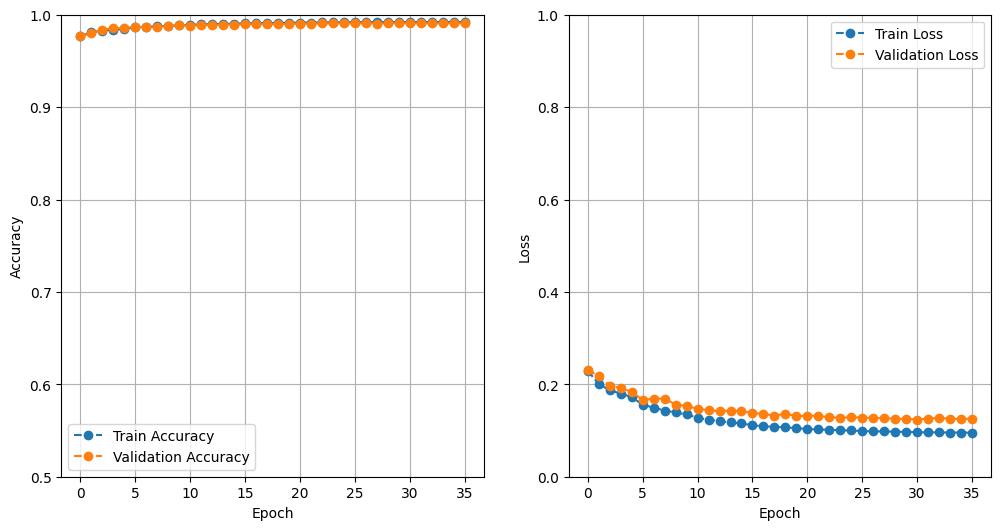

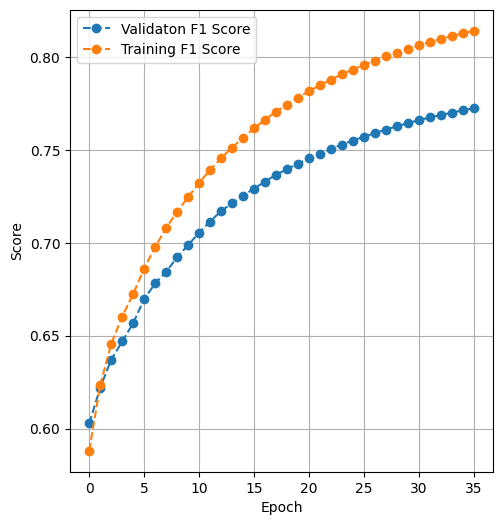

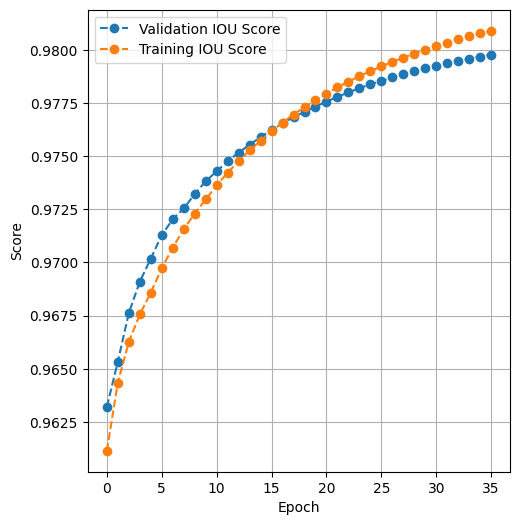

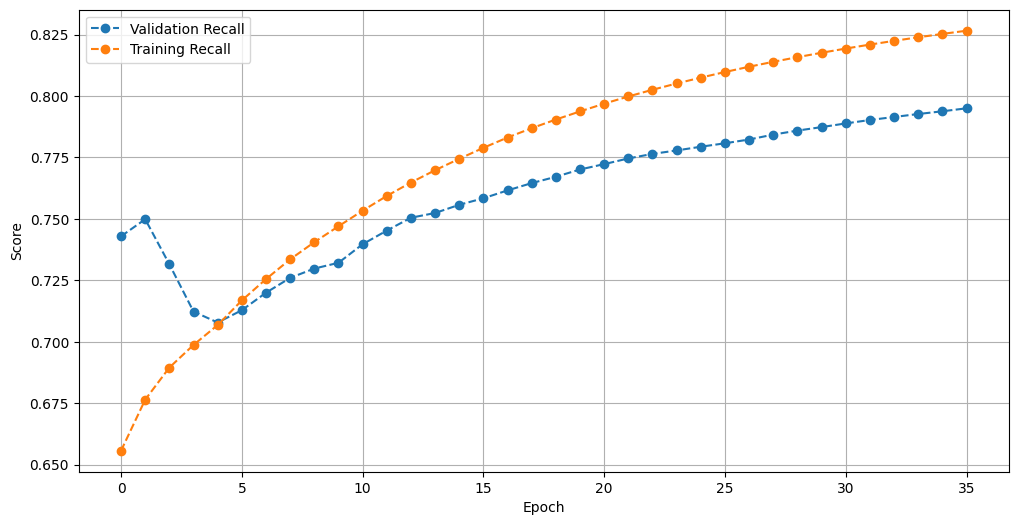

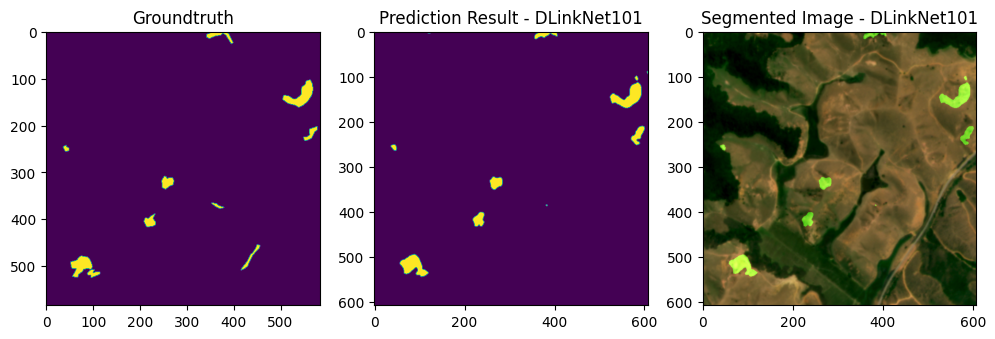

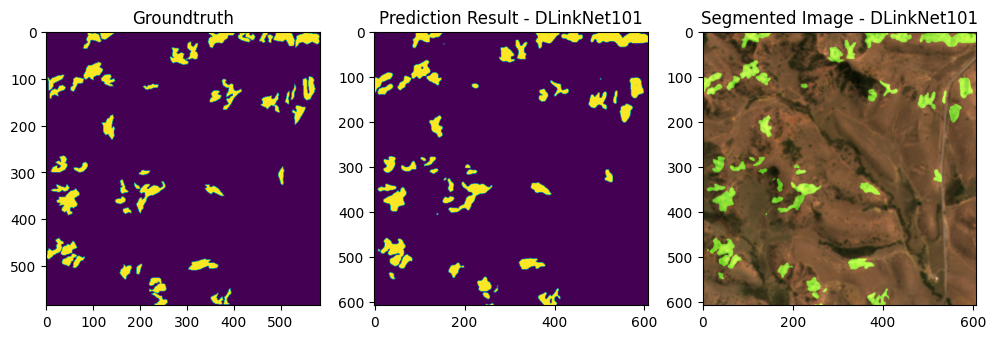

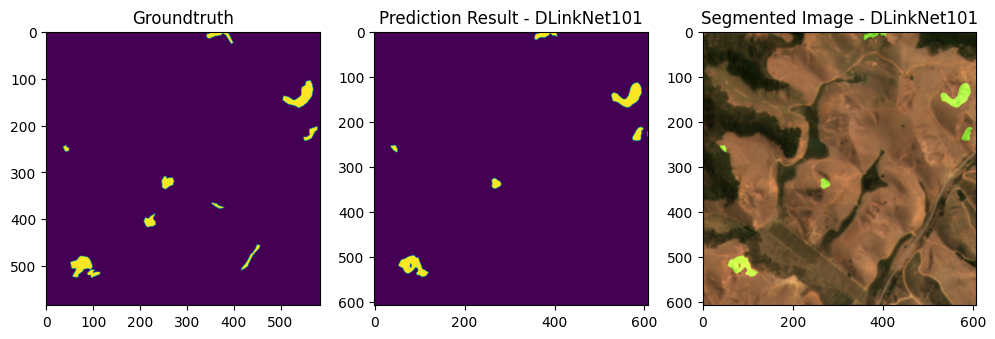

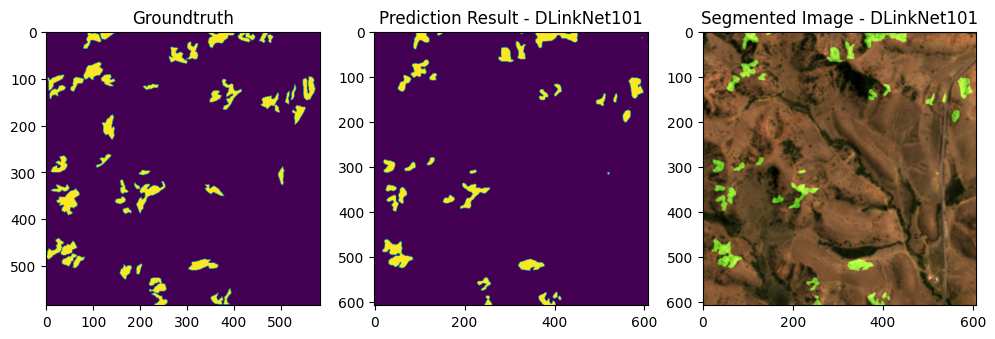

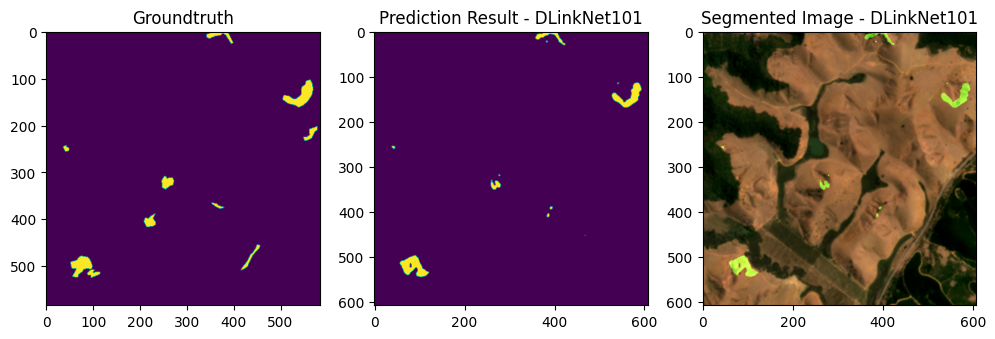

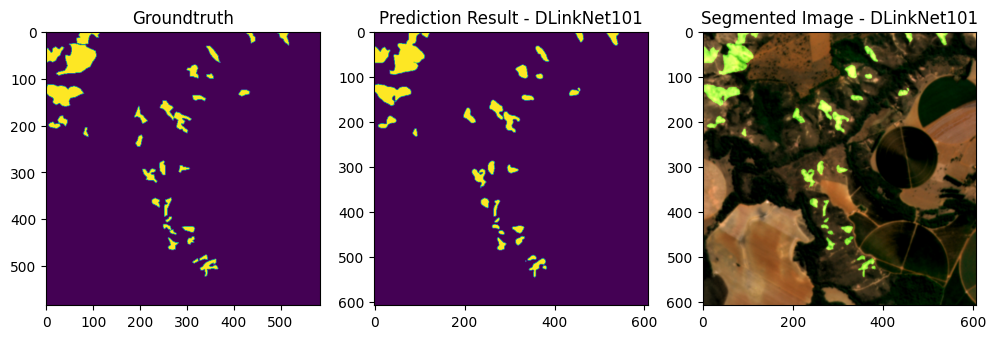

In [ ]:
# %%

if model_training:
    train(
        model,
        images_augmented,
        labels_augmented,
        images_validation,
        labels_validation,
        loss_func=BCEIoULoss(),
        batch_size=2,
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=5,
    )

if model_loading:
    # Load the model from your Google Drive or local file system
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)